# 분류실습
## 캐글 신용카드 사기 검출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

In [2]:
card_df = pd.read_csv('creditcard.csv')
card_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
import creditcard

In [4]:
x_train, x_test, y_train, y_test = creditcard.get_train_test_dataset(card_df)

print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_train.shape[0]*100)

학습 데이터 레이블 값 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    42.783552
1     0.074236
Name: count, dtype: float64


In [5]:
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
lr_pred_proba = lr_clf.predict_proba(x_test)[:,1]

In [6]:
creditcard.get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
 [[85281    14]
 [   57    91]]
정확도;0.9992 정밀도:0.8667 재현율:0.6149 F1:0.7194
ROC AUC:0.9703


In [7]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
creditcard.get_model_train_eval(lgbm_clf, ftr_train=x_train, ftr_test=x_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
 [[85290     5]
 [   36   112]]
정확도;0.9995 정밀도:0.9573 재현율:0.7568 F1:0.8453
ROC AUC:0.9790


### 데이터 분포도 변환 후 모델 학습/예측/평가

In [8]:
import seaborn as sns
import creditcard_plot

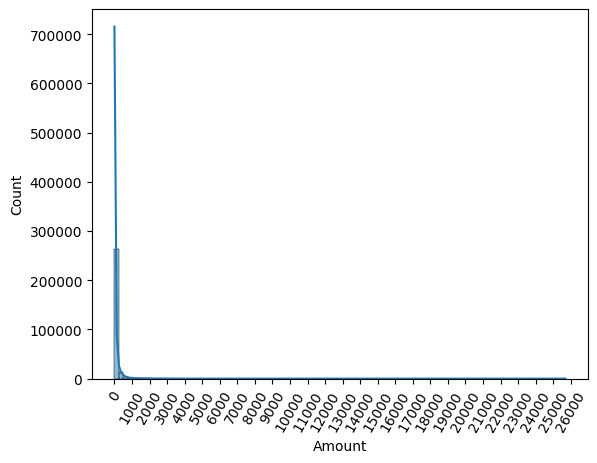

In [9]:
plt.figure()
plt.xticks(range(0,30000,1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

In [10]:
# Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행

x_train, x_test, y_train, y_test = creditcard.get_train_test_dataset(card_df)

print('## Logistic Regression 예측 성능 ##')
lr_clf = LogisticRegression(max_iter=1000)
creditcard.get_model_train_eval(lr_clf, ftr_train=x_train, ftr_test=x_test, tgt_train=y_train, tgt_test=y_test)

print('## LightGBM 예측 성능 ##')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
creditcard.get_model_train_eval(lgbm_clf, ftr_train=x_train, ftr_test=x_test, tgt_train=y_train, tgt_test=y_test)

## Logistic Regression 예측 성능 ##
오차 행렬
 [[85281    14]
 [   57    91]]
정확도;0.9992 정밀도:0.8667 재현율:0.6149 F1:0.7194
ROC AUC:0.9703
## LightGBM 예측 성능 ##
오차 행렬
 [[85290     5]
 [   36   112]]
정확도;0.9995 정밀도:0.9573 재현율:0.7568 F1:0.8453
ROC AUC:0.9790


<Axes: >

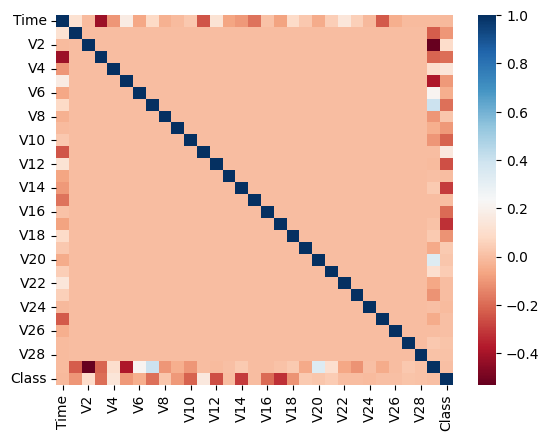

In [11]:
plt.figure()
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [12]:
outlier_index = creditcard_plot.get_outlier(df=card_df, column='V14', weight=1.5)
print("이상치 데이터 인덱스: ", outlier_index)

이상치 데이터 인덱스:  Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,   6338,
         6427,
       ...
       274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149, 281144,
       281674],
      dtype='int64', length=433)


In [13]:
x_train, x_test, y_train, y_test = creditcard.get_train_test_dataset2(card_df)

print('## Logistic Regression 예측 성능 ##')
lr_clf = LogisticRegression(max_iter=1000)
creditcard.get_model_train_eval(lr_clf, ftr_train=x_train, ftr_test=x_test, tgt_train=y_train, tgt_test=y_test)

print('## LightGBM 예측 성능 ##')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
creditcard.get_model_train_eval(lgbm_clf, ftr_train=x_train, ftr_test=x_test, tgt_train=y_train, tgt_test=y_test)

## Logistic Regression 예측 성능 ##
오차 행렬
 [[85293     2]
 [    1    17]]
정확도;1.0000 정밀도:0.8947 재현율:0.9444 F1:0.9189
ROC AUC:1.0000
## LightGBM 예측 성능 ##
오차 행렬
 [[85294     1]
 [    1    17]]
정확도;1.0000 정밀도:0.9444 재현율:0.9444 F1:0.9444
ROC AUC:1.0000


### SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
smote = SMOTE(random_state=0)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)
print('SMOTE 적용 전 Data Set: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 Data Set: ', x_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 Lable Value 분포: ', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 Data Set:  (199061, 29) (199061,)
SMOTE 적용 후 Data Set:  (398040, 29) (398040,)
SMOTE 적용 후 Lable Value 분포:  Class
0    199020
1    199020
Name: count, dtype: int64


In [16]:
lr_clf = LogisticRegression(max_iter=1000)

# ftr_train과 tgt_train 인자값이 SMOTE 증식된 x_train_over와 y_train_over로 변경됨 (주의)
creditcard.get_model_train_eval(lr_clf, ftr_train=x_train_over, ftr_test=x_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
 [[85292     3]
 [    1    17]]
정확도;1.0000 정밀도:0.8500 재현율:0.9444 F1:0.8947
ROC AUC:1.0000
